Clustering:
---

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. 

**In simple words, the aim is to segregate groups with similar traits and assign them into clusters**

### Clustering can be divided into two subgroups:
* Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not.

* Soft Clustering: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. 

### Types of Clustering Algorithms:

* Connectivity models: As the name suggests, these models are based on the notion that the data points closer in data space exhibit more similarity to each other than the data points lying farther away. These models can follow two approaches. In the first approach, **they start with classifying all data points into separate clusters & then aggregating them as the distance decreases**. **In the second approach, all data points are classified as a single cluster and then partitioned as the distance increases**. Also, the choice of distance function is subjective. These models are very to interpret but lacks scalability for handling big datasets. Examples of these models are hierarchical clustering algorithm and its variants.

* Centroid Models: These are iterative clustering algorithms in which the notion of similarity is derived by the **closeness of a data point to the centroid of the clusters**. K-Means clustering algorithm is a popular algorithm that falls into this category. In these models, the no. of clusters required at the end have to be mentioned beforehand, which makes it important to have prior knowledge of the dataset. These models run iteratively to find the local optima.

* Distribution Models: These clustering models are based on the notion of how probable is it that all data points in the cluster belong to the same distribution (For example: Normal, Gaussian). These models often suffer from overfitting. A popular example of these models is Expectation-maximization algorithm which uses multivariate normal distributions.

* Density Models: These models search the data space for areas of varied density of data points in the data space. It isolates various different density regions and assign the data points within these regions in the same cluster. Popular examples of density models are DBSCAN and OPTICS.



In this notebook, we will take a look at simple KMeans Clustering

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [6]:
# Load the iris dataset
iris_df = pd.read_csv('Iris.csv')
iris_df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
# Divide the data X, Y

# Finding the optimum number of clusters for k-means classification
X = iris_df.iloc[:, [0, 1, 2, 3]].values
y = iris_df['Species'].values

Let's encode categorical feature and take a look at different clusters

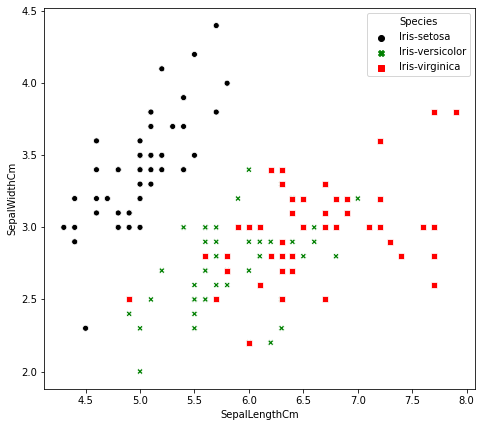

In [13]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

# label encode data
le = LabelEncoder()
y = le.fit_transform(y)

# Scatter Plot
fig, ax = plt.subplots(figsize=(17,7))
plt.subplot(1,2,1)
sns.scatterplot(x = iris_df.SepalLengthCm, y =  iris_df.SepalWidthCm,
                hue = iris_df.Species, style = iris_df.Species, palette=['black', 'green', 'red']);

#### How do you find the optimum number of clusters (K) for K Means? How does one determine the value of K?

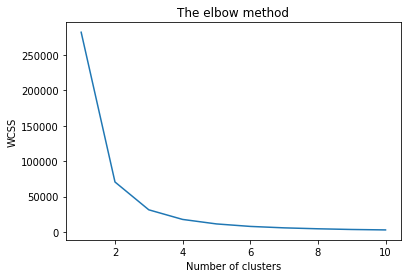

In [14]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

Using above method, we determine the value of K and create a kmeans classifier to create different group of clusters

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

Make sure the predicted clusters is divided into groups

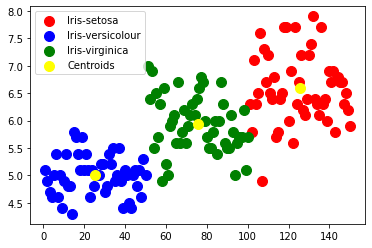

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()